# UK General Elections

The attached dataset holds 4 files, the results from the 2017 and 2019 General Elections in the United Kingdom. One file for each year focuses on the results by Constituency, while the other focuses on the results for each candidate running for election. 

A more thorough explanation of the headers and data contents of each file can be found in the accompanying `metadata.txt` file.

---

## Loading data into a dataframe, and Exploratory Data Analysis

To start with, we'll load one of the files into a Pandas dataframe, and have a look at some of the data

In [2]:
import pandas as pd
con19 = pd.read_csv("data/HoC-GE2019-results-by-constituency.csv") # con19 here stands for Constituencies 2019
con19.head()

,ons_id,ons_region_id,constituency_name,county_name,region_name,country_name,constituency_type,declaration_time,mp_firstname,mp_surname,...,green,snp,pc,dup,sf,sdlp,uup,alliance,other,other_winner
0,W07000049,W92000004,Aberavon,West Glamorgan,Wales,Wales,County,2019-12-13 02:30:00,Stephen,Kinnock,...,450,0,2711,0,0,0,0,0,731,0
1,W07000058,W92000004,Aberconwy,Clwyd,Wales,Wales,County,2019-12-13 03:09:00,Robin,Millar,...,0,0,2704,0,0,0,0,0,0,0
2,S14000001,S92000003,Aberdeen North,Scotland,Scotland,Scotland,Borough,2019-12-13 03:13:00,Kirsty,Blackman,...,880,20205,0,0,0,0,0,0,0,0
3,S14000002,S92000003,Aberdeen South,Scotland,Scotland,Scotland,Borough,2019-12-13 03:34:00,Stephen,Flynn,...,0,20388,0,0,0,0,0,0,0,0
4,S14000003,S92000003,Airdrie and Shotts,Scotland,Scotland,Scotland,County,2019-12-13 02:59:00,Neil,Gray,...,685,17929,0,0,0,0,0,0,0,0


As you can see, we've got a 32 columns here. (You might be mistaken for thinking that we only have 5 rows of data in the whole file, but `.head()` by default only shows 5 rows of data. You can display more by providing an integer as an argument, e.g. `.head(10)`). 
However, we can't see all 32 columns here, so let's get a bit more detail:

In [3]:
con19.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 650 entries, 0 to 649
Data columns (total 32 columns):
ons_id               650 non-null object
ons_region_id        650 non-null object
constituency_name    650 non-null object
county_name          650 non-null object
region_name          650 non-null object
country_name         650 non-null object
constituency_type    650 non-null object
declaration_time     650 non-null object
mp_firstname         650 non-null object
mp_surname           650 non-null object
mp_gender            650 non-null object
result               650 non-null object
first_party          650 non-null object
second_party         650 non-null object
electorate           650 non-null int64
valid_votes          650 non-null int64
invalid_votes        650 non-null int64
majority             650 non-null int64
con                  650 non-null int64
lab                  650 non-null int64
ld                   650 non-null int64
brexit               650 non-null int64
g

Now we can see that we have rows for 650 consituencies in total, with each one having a non-null entry in each of the displayed columns.
Similar information is available through:
* the `.columns` attribute, which holds a list of the column names;
* the `.shape` attribute, which holds the number of rows and columns in the dataframe;
* the `.describe()` function, which gives some statistical data about the distributions of numerical columns.

We could have got similar information by examining the `con19.columns` or `con19.shape` attributes, if we so wanted.

### Data Series

As well as looking at the dataframe as a whole, we can isolate individual rows or columns (or combinations of the two). An individual columns is known as a Series, and has some of its own functions that are different from those of the dataframe. 
For example, if we wanted to know the total size of the electorate (people who can validly vote) in the UK, we would want to look at the `electorate` column, like so:

In [4]:
con19['electorate']

0      50750
1      44699
2      62489
3      65719
4      64011
5      72617
6      60138
7      73107
8      62789
9      69976
10     63952
11     42215
12     66525
13     81726
14     78204
15     89553
16     67978
17     86665
18     71970
19     90116
20     66655
21     77953
22     65277
23     69504
24     70158
25     69906
26     82928
27     80024
28     67805
29     79558
       ...  
620    82526
621    80193
622    66259
623    76241
624    75680
625    68240
626    75582
627    75038
628    57280
629    55550
630    70402
631    83845
632    75424
633    83953
634    61660
635    62883
636    60534
637    73485
638    61370
639    75219
640    78585
641    49737
642    78093
643    74775
644    78077
645    76313
646    82468
647    51925
648    74899
649    74673
Name: electorate, Length: 650, dtype: int64

Note that you can also select multiple columns by providing a list of strings instead of just one string. For example, to select the columns `electorate` and `valid_votes`, you could use `con19[ ['electorate', 'valid_votes'] ]`.

After selecting a column, if it is numerical, we can then perform a `.sum()` operation on it to obtain the size of the UK electorate:

In [5]:
total_electorate = con19['electorate'].sum()
print("The size of the electorate is", total_electorate, "people.")

The size of the electorate is 47562702 people.


Another more useful function when dealing with non-numerical columns is the `.value_counts()` function, which sums up the instances of each entry in the column, and displays the result:

In [6]:
con19['first_party'].value_counts()

Con         365
Lab         202
SNP          48
LD           11
DUP           8
SF            7
PC            4
SDLP          2
Alliance      1
Spk           1
Green         1
Name: first_party, dtype: int64

### Filtering Rows

It is often useful to filter data based on the contents of one or more columns. Say, for example, we wanted to create a new dataframe that only had the constituencies in which a Female Conservative was elected.
To start with, we'd need to know what values existed in both the `first_party` and `mp_gender` columns, so that we could filter by them. This can be done with the `.unique()` function (applied to Series).

In [7]:
winning_parties = con19['first_party'].unique()
mp_genders = con19['mp_gender'].unique()
print("Elected Parties:", winning_parties)
print("MP Genders:", mp_genders)

Elected Parties: ['Lab' 'Con' 'SNP' 'PC' 'LD' 'DUP' 'SF' 'SDLP' 'Green' 'Spk' 'Alliance']
MP Genders: ['Male' 'Female']


We can see that Female MPs are represented by the string 'Female', whereas the Conservative party is contracted to 'Con'. Using this information, we can now filter the dataframe:

In [8]:
con19.loc[ (con19['first_party'] == 'Con') & (con19['mp_gender'] == 'Female') ]

,ons_id,ons_region_id,constituency_name,county_name,region_name,country_name,constituency_type,declaration_time,mp_firstname,mp_surname,...,green,snp,pc,dup,sf,sdlp,uup,alliance,other,other_winner
6,E14000531,E12000005,Aldridge-Brownhills,West Midlands,West Midlands,England,Borough,2019-12-13 02:51:00,Wendy,Morton,...,771,0,0,0,0,0,0,0,336,0
19,E14000539,E12000008,Banbury,Oxfordshire,South East,England,County,2019-12-13 04:53:00,Victoria,Prentis,...,2607,0,0,0,0,0,0,0,0,0
26,E14000545,E12000008,Basingstoke,Hampshire,South East,England,Borough,2019-12-13 02:58:00,Maria,Miller,...,2138,0,0,0,0,0,0,0,746,0
31,E14000550,E12000008,Beaconsfield,Buckinghamshire,South East,England,County,2019-12-13 04:09:00,Joy,Morrissey,...,2033,0,0,0,0,0,0,0,17602,0
40,E14000554,E12000001,Berwick-Upon-Tweed,Northumberland,North East,England,County,2019-12-13 03:41:00,Anne-Marie,Trevelyan,...,1394,0,0,0,0,0,0,0,0,0
55,E14000569,E12000001,Bishop Auckland,Durham,North East,England,County,2019-12-13 02:48:00,Dehenna,Davison,...,0,0,0,0,0,0,0,0,0,0
78,W07000068,W92000004,Brecon and Radnorshire,Powys,Wales,Wales,County,2019-12-13 03:40:00,Fay,Jones,...,0,0,0,0,0,0,0,0,590,0
99,E14000610,E12000005,Burton,Staffordshire,West Midlands,England,County,2019-12-13 03:14:00,Kate,Griffiths,...,1433,0,0,0,0,0,0,0,0,0
102,E14000613,E12000006,Bury St Edmunds,Suffolk,East,England,County,2019-12-13 03:31:00,Jo,Churchill,...,9711,0,0,0,0,0,0,0,1694,0
109,E14000618,E12000005,Cannock Chase,Staffordshire,West Midlands,England,County,2019-12-13 02:19:00,Amanda,Milling,...,2920,0,0,0,0,0,0,0,0,0


## Groupby

The `.groupby()` function can be used on a dataframe to create groups based on values in one or more columns. This can be useful when you want to iterate through all values in a column, instead of just filtering out for a single value.
`dataframe.groupby(X)` returns a pair of (value, group_by_value) for each unique value in column X in the dataframe, where 'group_by_value' contains all rows of the dataframe that have the specified value.

In [9]:
for region_name, region_group in con19.groupby("region_name"):
    print(region_name, ":", len(region_group))

East : 58
East Midlands : 46
London : 73
North East : 29
North West : 75
Northern Ireland : 18
Scotland : 59
South East : 84
South West : 55
Wales : 40
West Midlands : 59
Yorkshire and The Humber : 54


You can also groupby multiple columns at the same time, if you want to iterate over unique combinations.

In [10]:
for ((party, gender), group) in con19.groupby(["first_party", "mp_gender"]):
    print("{} ({}): {}".format(party, gender, len(group)))

Alliance (Male): 1
Con (Female): 87
Con (Male): 278
DUP (Female): 1
DUP (Male): 7
Green (Female): 1
LD (Female): 7
LD (Male): 4
Lab (Female): 104
Lab (Male): 98
PC (Female): 1
PC (Male): 3
SDLP (Female): 1
SDLP (Male): 1
SF (Female): 2
SF (Male): 5
SNP (Female): 16
SNP (Male): 32
Spk (Male): 1


Of course, this example is probably better suited to just grouping twice, like so:

In [11]:
for party, party_group in con19.groupby("first_party"):
    print("PARTY:", party)
    for gender, gender_group in party_group.groupby("mp_gender"):
        print(gender, ":", len(gender_group))
    print()

PARTY: Alliance
Male : 1

PARTY: Con
Female : 87
Male : 278

PARTY: DUP
Female : 1
Male : 7

PARTY: Green
Female : 1

PARTY: LD
Female : 7
Male : 4

PARTY: Lab
Female : 104
Male : 98

PARTY: PC
Female : 1
Male : 3

PARTY: SDLP
Female : 1
Male : 1

PARTY: SF
Female : 2
Male : 5

PARTY: SNP
Female : 16
Male : 32

PARTY: Spk
Male : 1



## Joining Dataframes

In this dataset, we have data from multiple files that we may want to join together. We'll look at an example of joining some of the data from the 2019 Constituencies datafile that we already have, and the 2017 Constituencies datafile that is also in the folder.

In [12]:
con17 = pd.read_csv("data/HoC-GE2017-constituency-results.csv")
con17.head()

,ons_id,ons_region_id,constituency_name,county_name,region_name,country_name,constituency_type,declaration_time,result,first_party,...,green,snp,pc,dup,sf,sdlp,uup,alliance,other,other_winner
0,W07000049,W92000004,Aberavon,West Glamorgan,Wales,Wales,County,2017-06-09 02:41:00,Lab hold,Lab,...,0,0,2761,0,0,0,0,0,0,0
1,W07000058,W92000004,Aberconwy,Clwyd,Wales,Wales,County,2017-06-09 02:31:00,Con hold,Con,...,0,0,3170,0,0,0,0,0,0,0
2,S14000001,S92000003,Aberdeen North,Scotland,Scotland,Scotland,Borough,2017-06-09 02:26:00,SNP hold,SNP,...,0,15170,0,0,0,0,0,0,522,0
3,S14000002,S92000003,Aberdeen South,Scotland,Scotland,Scotland,Borough,2017-06-09 03:08:00,Con gain from SNP,Con,...,0,13994,0,0,0,0,0,0,0,0
4,S14000003,S92000003,Airdrie and Shotts,Scotland,Scotland,Scotland,County,2017-06-09 03:10:00,SNP hold,SNP,...,0,14291,0,0,0,0,0,0,0,0


It looks pretty similar, so let's check that the data is in the same format. We can do this by checking that the both dataframes have the same columns, and the same row entries (just for different years). We'll check that the same values for `ons_id` exist in each dataframe as well. 

You may have noticed by now that each row has a number, which uniquely identifies that row. This is known as the Index of the dataframe, but we can change it to suit our requirements. We can assume here that the `ons_id` column has a unique value for each row of the dataframe, so we can use that as our Index instead. This will allow us to match up the rows for the same constituency in each datafile.

In [13]:
ons_con19 = con19.set_index("ons_id")
ons_con17 = con17.set_index("ons_id")
ons_con19.head()

,ons_region_id,constituency_name,county_name,region_name,country_name,constituency_type,declaration_time,mp_firstname,mp_surname,mp_gender,...,green,snp,pc,dup,sf,sdlp,uup,alliance,other,other_winner
ons_id,,,,,,,,,,,,,,,,,,,,,
W07000049,W92000004,Aberavon,West Glamorgan,Wales,Wales,County,2019-12-13 02:30:00,Stephen,Kinnock,Male,...,450,0,2711,0,0,0,0,0,731,0
W07000058,W92000004,Aberconwy,Clwyd,Wales,Wales,County,2019-12-13 03:09:00,Robin,Millar,Male,...,0,0,2704,0,0,0,0,0,0,0
S14000001,S92000003,Aberdeen North,Scotland,Scotland,Scotland,Borough,2019-12-13 03:13:00,Kirsty,Blackman,Female,...,880,20205,0,0,0,0,0,0,0,0
S14000002,S92000003,Aberdeen South,Scotland,Scotland,Scotland,Borough,2019-12-13 03:34:00,Stephen,Flynn,Male,...,0,20388,0,0,0,0,0,0,0,0
S14000003,S92000003,Airdrie and Shotts,Scotland,Scotland,Scotland,County,2019-12-13 02:59:00,Neil,Gray,Male,...,685,17929,0,0,0,0,0,0,0,0


_(We could also change the index of the original dataframe, instead of creating a new variable called 'ons_con19', by using the `inplace` argument like so: `con19.set_index("ons_id", inplace=True)`. However, this is potentially inadvisable here due to the non-sequential nature of Jupyter Notebooks.)_

Now, we have to decide what columns we'd like to join together. As a simple example, if we wanted to compare the numbers of electorate, valid votes and invalid votes for each year, we'd have to rename each of those columns (we'll rename them in both dataframes to avoid confusion). After that, we'll drop all of the columns that we don't need in the `con17` dataframe, and then join them together on their Indexes.

In [14]:
# Column Renaming Method 1 - Useful for renaming a small subset of columns
con19_column_name_dict = {"electorate": "electorate_2019", "valid_votes": "valid_votes_2019",
                          "invalid_votes": "invalid_votes_2019"}
renamed_con19 = ons_con19.rename(columns=con19_column_name_dict)

# Select a subset of columns from `con17` to add to `con19`
merging_con17 = ons_con17[ ['electorate', 'valid_votes', 'invalid_votes'] ]

# Column Renaming Method 2 - Useful for renaming all columns in a dataframe at once.
# However, take care, as the labels MUST be in order.
merging_con17.columns = ["electorate_2017", "valid_votes_2017", "invalid_votes_2017"]

# Join merging_con17 onto renamed_con19, joining along the Index (currently 'ons_id')
joined_data = renamed_con19.join(merging_con17)

# Check the resulting dataframe
joined_data.head()

,ons_region_id,constituency_name,county_name,region_name,country_name,constituency_type,declaration_time,mp_firstname,mp_surname,mp_gender,...,dup,sf,sdlp,uup,alliance,other,other_winner,electorate_2017,valid_votes_2017,invalid_votes_2017
ons_id,,,,,,,,,,,,,,,,,,,,,
W07000049,W92000004,Aberavon,West Glamorgan,Wales,Wales,County,2019-12-13 02:30:00,Stephen,Kinnock,Male,...,0,0,0,0,0,731,0,49892,33268,57
W07000058,W92000004,Aberconwy,Clwyd,Wales,Wales,County,2019-12-13 03:09:00,Robin,Millar,Male,...,0,0,0,0,0,0,0,45251,32150,78
S14000001,S92000003,Aberdeen North,Scotland,Scotland,Scotland,Borough,2019-12-13 03:13:00,Kirsty,Blackman,Female,...,0,0,0,0,0,0,0,62130,36757,55
S14000002,S92000003,Aberdeen South,Scotland,Scotland,Scotland,Borough,2019-12-13 03:34:00,Stephen,Flynn,Male,...,0,0,0,0,0,0,0,64964,44493,63
S14000003,S92000003,Airdrie and Shotts,Scotland,Scotland,Scotland,County,2019-12-13 02:59:00,Neil,Gray,Male,...,0,0,0,0,0,0,0,64146,38002,47


## Plotting data from a Dataframe

Often the easiest way to explore your data is by plotting it. Here, we'll look at a couple of examples of plotting your data with `Matplotlib` directly from a dataframe.

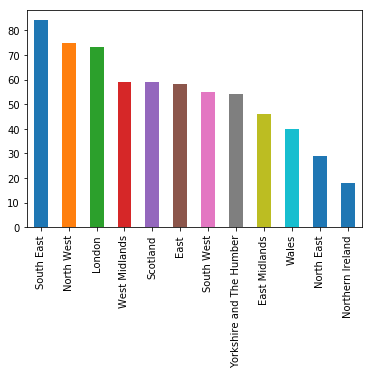

In [17]:
import matplotlib.pyplot as plt
# Creating a bar plot
region_constituency_count = joined_data['region_name'].value_counts()
region_constituency_count.plot(kind="bar")
plt.show()

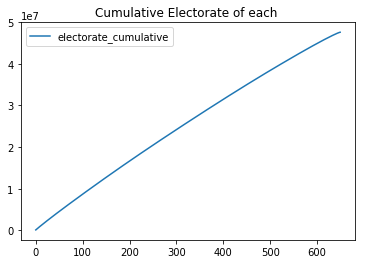

In [18]:
# Creating a line plot
line_data = con19.sort_values(by="electorate", ascending=False).reset_index()
line_data['electorate_cumulative'] = line_data['electorate'].cumsum()
line_data.plot(kind="line", y="electorate_cumulative", title="Cumulative Electorate of each ")
plt.show()